In [1]:
from EDA import *

## Importação dos dados de Maturidade dos municípios da plataforma inteli.gente (MCTI)

Plataforma do Ministério da Ciência, Tecnologia e Inovação (MCTI) que define cidades inteligentes como:

"... **cidades comprometidas com o desenvolvimento urbano sustentável e a transformação digital**, em seus aspectos econômico, meio ambiente, sociocultural e de capacidade institucional, ... e **utilizam tecnologias para solucionar problemas concretos, criar oportunidades, oferecer serviços com eficiência, reduzir desigualdades,** aumentar a resiliência **e melhorar a qualidade de vida de todas as pessoas**, garantindo o **uso seguro e responsável de dados** e das tecnologias da informação e comunicação.**"

<br><br>

<img src="imgs/art_dimensoes.png" alt="Sample Plot" width="1000"/>

**fonte:** https://inteligente.mcti.gov.br/

In [2]:
df_maturidade = pd.read_csv('data/maturidade.csv')

# Divide coluna identificadora em município & estado (uf)
df_maturidade[['municipio', 'uf']] = df_maturidade['nome'].str.split(r' \(', expand=True)
df_maturidade['uf'] = df_maturidade['uf'].str.replace(')', '')
df_maturidade['municipio'] = df_maturidade['municipio'].str.upper().apply(unidecode)

# Seleciona colunas
df_maturidade = df_maturidade[['codigo', 'municipio', 'uf', 'latitude', 'longitude',
                               'Nivel Sociocultural', 'Nivel Economica',
                               'Nivel Capacidades Institucionais', 'Nivel Meio Ambiente',
                               'PIB per capita do municipio', 'PIB Serviços', 'PIB Industria',
                               'PIB Adminstração Publica', 'PIB Agropecuária', 'Populacao Estimada',
                               'População ocupada com vinculo formal']]

# Calcula porcentagem de população com ocupação laboral
df_maturidade['Ocupacao_populacao'] = df_maturidade['População ocupada com vinculo formal'] / df_maturidade['Populacao Estimada']

df_maturidade

codigo            municipio  uf  latitude  longitude  \
0     5200050      ABADIA DE GOIAS  GO -16.75730   -49.4412   
1     3100104  ABADIA DOS DOURADOS  MG -18.48310   -47.3916   
2     5200100            ABADIANIA  GO -16.19700   -48.7057   
3     3100203               ABAETE  MG -19.15510   -45.4444   
4     1500107           ABAETETUBA  PA  -1.72183   -48.8788   
...       ...                  ...  ..       ...        ...   
5565  2933604          XIQUE-XIQUE  BA -10.82300   -42.7245   
5566  2517407               ZABELE  PB  -8.07901   -37.1057   
5567  3557154             ZACARIAS  SP -21.05060   -50.0552   
5568  2114007              ZE DOCA  MA  -3.27014   -45.6553   
5569  4219853               ZORTEA  SC -27.45210   -51.5520   

      Nivel Sociocultural  Nivel Economica  Nivel Capacidades Institucionais  \
0                       3                4                                 2   
1                       3                3                                 2   
2                       3                4                                 3   
3                       4                4                                 2   
4                       3                4                                 2   
...                   ...              ...                               ...   
5565                    3                3                                 3   
5566                    3                3                                 2   
5567                    3                4                                 2   
5568                    3                3                                 2   
5569                    3                4                                 2   

      Nivel Meio Ambiente  PIB per capita do municipio  PIB Serviços  \
0                       4                     38622.00      155667.0   
1                       2                     25174.26       43394.0   
2                       3                     21334.94      168151.0   
3                       2                     23266.10      220438.0   
4                       2                     12150.04      754254.0   
...                   ...                          ...           ...   
5565                    2                      9904.22      161806.0   
5566                    2                     11882.14        6026.0   
5567                    4                     46763.19       29175.0   
5568                    2                     10867.33      211289.0   
5569                    2                     30199.01       32234.0   

      PIB Industria  PIB Adminstração Publica  PIB Agropecuária  \
0           79642.0                   60642.0           14324.0   
1           10618.0                   38588.0           75110.0   
2           56944.0                   93456.0           81207.0   
3           40612.0                  108971.0          127033.0   
4           73666.0                  670593.0          272103.0   
...             ...                       ...               ...   
5565        15884.0                  193315.0           60719.0   
5566          977.0                   16127.0            2868.0   
5567        13184.0                   21355.0           60922.0   
5568        24075.0                  216128.0           66241.0   
5569         4273.0                   25638.0           36853.0   

      Populacao Estimada  População ocupada com vinculo formal  \
0                19128.0                                1703.0   
1                 6272.0                                1342.0   
2                17232.0                                2823.0   
3                22675.0                                5884.0   
4               158188.0                               16450.0   
...                  ...                                   ...   
5565             44757.0                                4258.0   
5566              2228.0                                 148.0   
5567              2692.0 

In [3]:
# Verificação de valores faltantes

## São verificados 404 valores faltantes na feature "df_maturidade.isna().sum()"
## No tratamento dos dados sera feita a inputação utilizando valores obtidos via plataforma RAIS (Ministério do Trabalho)
## obs. "Ocupacao_populacao" é uma feature calculada
df_maturidade.isna().sum()[df_maturidade.isna().sum() > 0]

População ocupada com vinculo formal    404
Ocupacao_populacao                      404
dtype: int64

## Importação dos dados de investimento público de 2023 (MF)

Os dados são obtidos via "Portal de Dados Abertos" do Governo Federal, além disso também são disponibilizados os metadados (fornecem informações adicionais sobre as features). O orgão responsável pelos dados é o Ministério da Fazenda (MF), que fornece a seguinte descrição para o conjunto de dados:

"Corresponde ao **pagamento total (despesas do exercício pagas e restos a pagar pagos) dos grupos de natureza de despesa 4 (investimentos) e 5 (inversões financeiras)**, exceto as despesas financeiras, que compõem o Orçamento Fiscal e da Seguridade Social.

**Investimentos** são despesas orçamentárias com **softwares** e com o **planejamento e a execução de obras**, inclusive com a aquisição de imóveis considerados necessários à realização destas últimas, e com a **aquisição de instalações, equipamentos e material permanente**.

**Inversões financeiras** são despesas orçamentárias com a **aquisição de imóveis ou bens de capital já em utilização**; **aquisição de títulos** representativos do capital de empresas ou entidades de qualquer espécie, já constituídas, quando a operação não importe aumento do capital; e com a constituição ou aumento do capital de empresas, além de outras despesas classificáveis neste grupo.

**Os dados são obtidos a partir de consultas junto ao Sistema Integrado de Administração Financeira do Governo Federal – SIAFI.**"

**fonte dos dados:** https://dados.gov.br/dados/conjuntos-dados/investimento-publico
**fonte metadados:** https://www.tesourotransparente.gov.br/ckan/dataset/e048826b-b6b0-4d92-9204-fd218b1f25b3/resource/91cbf16f-19e6-48e4-b059-12b7a0758d25/download/Metadados-Investimentos.pdf

In [4]:
df = pd.read_csv('data/Investimentos_publicos_2023.csv')
df

ano       mes  esfera_orcamentaria        esfera_orcamentaria_desc  \
0      2023   JANEIRO                    1                ORCAMENTO FISCAL   
1      2023   JANEIRO                    1                ORCAMENTO FISCAL   
2      2023   JANEIRO                    1                ORCAMENTO FISCAL   
3      2023   JANEIRO                    1                ORCAMENTO FISCAL   
4      2023   JANEIRO                    1                ORCAMENTO FISCAL   
...     ...       ...                  ...                             ...   
44661  2023  DEZEMBRO                    2  ORCAMENTO DE SEGURIDADE SOCIAL   
44662  2023  DEZEMBRO                    2  ORCAMENTO DE SEGURIDADE SOCIAL   
44663  2023  DEZEMBRO                    2  ORCAMENTO DE SEGURIDADE SOCIAL   
44664  2023  DEZEMBRO                    2  ORCAMENTO DE SEGURIDADE SOCIAL   
44665  2023  DEZEMBRO                    2  ORCAMENTO DE SEGURIDADE SOCIAL   

       orgao_maximo                            orgao_maximo_desc     uo  \
0              1000                         CAMARA DOS DEPUTADOS   1101   
1              1000                         CAMARA DOS DEPUTADOS   1901   
2              2000                               SENADO FEDERAL   2101   
3              2000                               SENADO FEDERAL   2101   
4              3000                  TRIBUNAL DE CONTAS DA UNIAO   3101   
...             ...                                          ...    ...   
44661         81000  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA  81101   
44662         81000  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA  81101   
44663         81000  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA  81901   
44664         81000  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA  81902   
44665         81000  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA  81902   

                                            uo_desc  grupo_despesa  \
0                              CAMARA DOS DEPUTADOS              4   
1            FUNDO ROTATIVO DA CAMARA DOS DEPUTADOS              4   
2                                    SENADO FEDERAL              4   
3                                    SENADO FEDERAL              4   
4                       TRIBUNAL DE CONTAS DA UNIAO              4   
...                                             ...            ...   
44661         MINISTERIO DOS DIREITOS HUMANOS - MDH              4   
44662         MINISTERIO DOS DIREITOS HUMANOS - MDH              4   
44663  FUNDO NACPARA A CRIANCA E O ADOLESCENTE-FNCA              4   
44664                 FUNDO NACIONAL DO IDOSO - FNI              4   
44665                 FUNDO NACIONAL DO IDOSO - FNI              4   

      grupo_despesa_desc  ...                             subfuncao_desc  \
0          INVESTIMENTOS  ...                           ACAO LEGISLATIVA   
1          INVESTIMENTOS  ...                           ACAO LEGISLATIVA   
2          INVESTIMENTOS  ...                           ACAO LEGISLATIVA   
3          INVESTIMENTOS  ...                           ACAO LEGISLATIVA   
4          INVESTIMENTOS  ...                           CONTROLE EXTERNO   
...                  ...  ...                                        ...   
44661      INVESTIMENTOS  ...       ASSISTENCIA A PESSOA COM DEFICIENCIA   
44662      INVESTIMENTOS  ...  DIREITOS INDIVIDUAIS, COLETIVOS E DIFUSOS   
44663      INVESTIMENTOS  ...     ASSISTENCIA A CRIANCA E AO ADOLESCENTE   
44664      INVESTIMENTOS  ...                       ASSISTENCIA AO IDOSO   
44665      INVESTIMENTOS  ...  DIREITOS INDIVIDUAIS, COLETIVOS E DIFUSOS   

      programa                                                 programa_desc  \
0           34          PROGRAMA DE GESTAO E MANUTENCAO DO PODER LEGISLATIVO   
1           34          PROGRAMA DE GESTAO E MANUTENCAO DO PODER LEGISLATIVO   
2           34          PROGRAMA DE GESTAO E MANUTENCAO DO PODER LEGISLATIVO   
3          551                         ATUACAO LEGISLATIVA DO SENADO FEDERAL   
4           34  

In [5]:
# Verificação de valores faltantes
df.isna().sum().sum()

0

In [6]:
# Filtragem de features (removidos ano e códigos)
df = df[df.columns[~df.columns.isin(['ano', 'esfera_orcamentaria', 'orgao_maximo', 'uo',
                                     'grupo_despesa', 'aplicacao', 'resultado', 'funcao',
                                     'subfuncao', 'programa', 'acao', ])]].copy()
# Conversão de tipo
df['movimento_liquido_reais'] = df['movimento_liquido_reais'].astype(float)

# Inclusão do código de cidades (padrão IBGE)
df = pd.merge(df, df_maturidade[['municipio', 'uf', 'codigo']], how = 'left', on = ['municipio', 'uf'])

## Criando categorias 'Primario' e 'Despesa' para descrever o tipo de orçamento
df.loc[:, 'Tipo_resultado'] = df['resultado_desc'].apply(lambda x: 'Primario' if 'PRIM' in x else 'Despesa')

## Mapeamento de meses para valores ordinais
mes_to_num = {
    'JANEIRO': 1, 'FEVEREIRO': 2, 'MARCO': 3, 'ABRIL': 4, 'MAIO': 5, 'JUNHO': 6,
    'JULHO': 7, 'AGOSTO': 8, 'SETEMBRO': 9, 'OUTUBRO': 10, 'NOVEMBRO': 11, 'DEZEMBRO': 12
}
df['mes_num'] = df['mes'].map(mes_to_num)

df

mes        esfera_orcamentaria_desc  \
0       JANEIRO                ORCAMENTO FISCAL   
1       JANEIRO                ORCAMENTO FISCAL   
2       JANEIRO                ORCAMENTO FISCAL   
3       JANEIRO                ORCAMENTO FISCAL   
4       JANEIRO                ORCAMENTO FISCAL   
...         ...                             ...   
44661  DEZEMBRO  ORCAMENTO DE SEGURIDADE SOCIAL   
44662  DEZEMBRO  ORCAMENTO DE SEGURIDADE SOCIAL   
44663  DEZEMBRO  ORCAMENTO DE SEGURIDADE SOCIAL   
44664  DEZEMBRO  ORCAMENTO DE SEGURIDADE SOCIAL   
44665  DEZEMBRO  ORCAMENTO DE SEGURIDADE SOCIAL   

                                 orgao_maximo_desc  \
0                             CAMARA DOS DEPUTADOS   
1                             CAMARA DOS DEPUTADOS   
2                                   SENADO FEDERAL   
3                                   SENADO FEDERAL   
4                      TRIBUNAL DE CONTAS DA UNIAO   
...                                            ...   
44661  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA   
44662  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA   
44663  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA   
44664  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA   
44665  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA   

                                            uo_desc grupo_despesa_desc  \
0                              CAMARA DOS DEPUTADOS      INVESTIMENTOS   
1            FUNDO ROTATIVO DA CAMARA DOS DEPUTADOS      INVESTIMENTOS   
2                                    SENADO FEDERAL      INVESTIMENTOS   
3                                    SENADO FEDERAL      INVESTIMENTOS   
4                       TRIBUNAL DE CONTAS DA UNIAO      INVESTIMENTOS   
...                                             ...                ...   
44661         MINISTERIO DOS DIREITOS HUMANOS - MDH      INVESTIMENTOS   
44662         MINISTERIO DOS DIREITOS HUMANOS - MDH      INVESTIMENTOS   
44663  FUNDO NACPARA A CRIANCA E O ADOLESCENTE-FNCA      INVESTIMENTOS   
44664                 FUNDO NACIONAL DO IDOSO - FNI      INVESTIMENTOS   
44665                 FUNDO NACIONAL DO IDOSO - FNI      INVESTIMENTOS   

                                 aplicacao_desc  \
0                            APLICACOES DIRETAS   
1                            APLICACOES DIRETAS   
2                            APLICACOES DIRETAS   
3                            APLICACOES DIRETAS   
4                            APLICACOES DIRETAS   
...                                         ...   
44661               TRANSFERENCIAS A MUNICIPIOS   
44662                        APLICACOES DIRETAS   
44663  TRANSFER A ESTADOS E AO DISTRITO FEDERAL   
44664                        APLICACOES DIRETAS   
44665                        APLICACOES DIRETAS   

                                               resultado_desc  \
0                                     PRIMARIO DISCRICIONARIO   
1                                     PRIMARIO DISCRICIONARIO   
2                                     PRIMARIO DISCRICIONARIO   
3                                     PRIMARIO DISCRICIONARIO   
4                                     PRIMARIO DISCRICIONARIO   
...                                                       ...   
44661  DESPESA DISCRICIONARIA DECORRENTE DE EMENDA INDIVIDUAL   
44662  DESPESA DISCRICIONARIA DECORRENTE DE EMENDA DE BANCADA   
44663                                 PRIMARIO DISCRICIONARIO   
44664                                 PRIMARIO DISCRICIONARIO   
44665                                 PRIMARIO DISCRICIONARIO   

                 funcao_desc                             subfuncao_desc  \
0                LEGISLATIVA                           ACAO LEGISLATIVA   
1                LEGISLATIVA                           ACAO LEGISLATIVA   
2                LEGISLATIVA                           ACAO LEGISLATIVA   
3                LEGISLATIVA                           ACAO LEGISLATIVA   
4                LEGISLATIVA                           CONTROLE EXTERNO   
...              

## Exploração das variáveis categóricas

As definições dos termos técnicos são obtidos no site do Congresso Federal. Em primeiro momento é feito o delineamento de escopo, selecionando alguns dos casos para análise. Posteriormente outras dimensões dos dados estudados poderão ser incorporadas.

**fonte:** https://www.congressonacional.leg.br/legislacao-e-publicacoes/glossario-orcamentario/

## Definição de escopo através das proporções das categorias

In [7]:
# Tipo de orçamento
## Decisão de projeto: focar inicialmente no Orçamento fiscal - isso permitirá verificar se o nível de investimento em orgãos públicos terá relação direta com o nível de maturidade do município.

'''
Orçamento fiscal: Parcela do orçamento que compreende as dotações referentes aos Poderes da União, seus fundos, órgãos e entidades da administração direta e indireta, inclusive fundações instituídas e mantidas pelo Poder Público, excluindo-se as dotações destinadas à seguridade social e as relativas aos investimentos das estatais não dependentes.

Orçamento da Seguridade Social: Parcela do orçamento que abrange todas as dotações referentes às ações de saúde, previdência e assistência social das entidades e órgãos da administração direta ou indireta, bem como os fundos e fundações instituídos e mantidos pelo Poder Público.
'''

get_ratios(df, 'esfera_orcamentaria_desc')

Feature's unique values  Ratio (%)
0  ORCAMENTO DE SEGURIDADE SOCIAL      15.55
1                ORCAMENTO FISCAL      84.45

In [8]:
# Grupo Despesa
## Decisão de projeto: focar inicialmente em Investimentos - devido à natureza da destinação de recursos (softwares, obras, instalações, equipamentos, etc).

get_ratios(df, 'grupo_despesa_desc')

Feature's unique values  Ratio (%)
0   INVERSOES FINANCEIRAS       0.37
1           INVESTIMENTOS      99.63

In [9]:
# Resultado primário
## Decisão de projeto: focar inicialmente em resultado primário e despesa no geral - um estudo sobre as despesas poderá ser realizado, talvez considerando o tipo de emenda (despesas) e a obrigatoriedade (primário).

## Apesar de Despesa ser ~60% dos casos e primário ~40%
## Primário tem 3x mais volume que despesas de movimento de recursos

'''
Discricionário: cuja execução está sujeita à avaliação de oportunidade pelo gestor.

Resultado Primário: Diferença entre receitas primárias e despesas primárias. Configura-se deficit primário se o resultado for negativo, ou superavit primário, se positivo.
'''

display(get_ratios(df, 'resultado_desc'))

display(get_ratios(df, 'Tipo_resultado'))

df[['Tipo_resultado', 'movimento_liquido_reais']].groupby('Tipo_resultado').sum()

Feature's unique values  Ratio (%)
0  DESPDISCDECORRENTE DE EMENDA DIRGERAL PLOA,EXCORDEM TEC       2.23
1   DESPDISCDECORRENTE DE EMENDA SF,CD E COMISSAO MISTA CN       0.62
2   DESPESA DISCRICIONARIA DECORRENTE DE EMENDA DE BANCADA       7.87
3   DESPESA DISCRICIONARIA DECORRENTE DE EMENDA INDIVIDUAL      47.69
4                                  PRIMARIO DISCRICIONARIO      36.97
5                                     PRIMARIO OBRIGATORIO       1.10
6                              PRIMARIO SEM IMPACTO FISCAL       3.53

Feature's unique values  Ratio (%)
0                 Despesa       58.4
1                Primario       41.6

movimento_liquido_reais
Tipo_resultado                         
Despesa                    1.892413e+10
Primario                   6.244120e+10

In [10]:
# Região de aplicação
## Decisão de projeto: Não contemplar investimentos que sejam no exterior, sem informação ou a nível nacional. Uma vez que a granularidade dos indicadores de maturidade é a nível municipal, a mesma granulariadade será adotada em primeiro momento.

get_ratios(df, 'regiao')

Feature's unique values  Ratio (%)
0            CENTRO-OESTE       8.63
1                EXTERIOR       0.20
2                NACIONAL      24.91
3                NORDESTE      24.46
4                   NORTE      13.16
5          SEM INFORMACAO       0.02
6                 SUDESTE      18.58
7                     SUL      10.03

In [11]:
# Aplicando filtros de acordo com decisões de projeto

## Aplicando decisões de projeto
df_investimento = df[(df['esfera_orcamentaria_desc'] == 'ORCAMENTO FISCAL') &
                              (df['grupo_despesa_desc'] == 'INVESTIMENTOS') &
                              (~df['uf_desc'].isin(['NACIONAL', 'EXTERIOR', 'SEM INFORMACAO'])) &
                              (df['municipio'] != 'SEM INFORMACAO').copy()
]

## Considerando somente valores de investimentos diferentes de 0
df_investimento = df_investimento[df_investimento['movimento_liquido_reais'] != 0]

df_investimento

mes esfera_orcamentaria_desc  \
0       JANEIRO         ORCAMENTO FISCAL   
1       JANEIRO         ORCAMENTO FISCAL   
2       JANEIRO         ORCAMENTO FISCAL   
3       JANEIRO         ORCAMENTO FISCAL   
5       JANEIRO         ORCAMENTO FISCAL   
...         ...                      ...   
43590  DEZEMBRO         ORCAMENTO FISCAL   
43597  DEZEMBRO         ORCAMENTO FISCAL   
43605  DEZEMBRO         ORCAMENTO FISCAL   
43626  DEZEMBRO         ORCAMENTO FISCAL   
43629  DEZEMBRO         ORCAMENTO FISCAL   

                                 orgao_maximo_desc  \
0                             CAMARA DOS DEPUTADOS   
1                             CAMARA DOS DEPUTADOS   
2                                   SENADO FEDERAL   
3                                   SENADO FEDERAL   
5                         SUPREMO TRIBUNAL FEDERAL   
...                                            ...   
43590            MINISTERIO DE PORTOS E AEROPORTOS   
43597  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA   
43605  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA   
43626  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA   
43629  MINISTERIO DOS DIREITOS HUMANOS E CIDADANIA   

                                      uo_desc grupo_despesa_desc  \
0                        CAMARA DOS DEPUTADOS      INVESTIMENTOS   
1      FUNDO ROTATIVO DA CAMARA DOS DEPUTADOS      INVESTIMENTOS   
2                              SENADO FEDERAL      INVESTIMENTOS   
3                              SENADO FEDERAL      INVESTIMENTOS   
5                    SUPREMO TRIBUNAL FEDERAL      INVESTIMENTOS   
...                                       ...                ...   
43590         FUNDO NACIONAL DE AVIACAO CIVIL      INVESTIMENTOS   
43597   MINISTERIO DOS DIREITOS HUMANOS - MDH      INVESTIMENTOS   
43605   MINISTERIO DOS DIREITOS HUMANOS - MDH      INVESTIMENTOS   
43626   MINISTERIO DOS DIREITOS HUMANOS - MDH      INVESTIMENTOS   
43629   MINISTERIO DOS DIREITOS HUMANOS - MDH      INVESTIMENTOS   

                                                aplicacao_desc  \
0                                           APLICACOES DIRETAS   
1                                           APLICACOES DIRETAS   
2                                           APLICACOES DIRETAS   
3                                           APLICACOES DIRETAS   
5                                           APLICACOES DIRETAS   
...                                                        ...   
43590                                       APLICACOES DIRETAS   
43597                 TRANSFER A ESTADOS E AO DISTRITO FEDERAL   
43605                 TRANSFER A ESTADOS E AO DISTRITO FEDERAL   
43626  TRANSFERENCIA INSTITUICOES PRIVADAS SEM FINS LUCRATIVOS   
43629  TRANSFERENCIA INSTITUICOES PRIVADAS SEM FINS LUCRATIVOS   

                                               resultado_desc  \
0                                     PRIMARIO DISCRICIONARIO   
1                                     PRIMARIO DISCRICIONARIO   
2                                     PRIMARIO DISCRICIONARIO   
3                                     PRIMARIO DISCRICIONARIO   
5                                     PRIMARIO DISCRICIONARIO   
...                                                       ...   
43590  DESPESA DISCRICIONARIA DECORRENTE DE EMENDA DE BANCADA   
43597  DESPESA DISCRICIONARIA DECORRENTE DE EMENDA INDIVIDUAL   
43605  DESPESA DISCRICIONARIA DECORRENTE DE EMENDA DE BANCADA   
43626  DESPESA DISCRICIONARIA DECORRENTE DE EMENDA INDIVIDUAL   
43629  DESPESA DISCRICIONARIA DECORRENTE DE EMENDA INDIVIDUAL   

                 funcao_desc                             subfuncao_desc  \
0                LEGISLATIVA                           ACAO LEGISLATIVA   
1                LEGISLATIVA                           ACAO LEGISLATIVA   
2                LEGISLATIVA                           ACAO LEGISLATIVA   
3                LEGISLATIVA                           ACAO LEGISLATIVA   
5                 JUDICIARIA                            ACAO JUDICIA

## Visualização exploratória dos dados - Dados investimento público

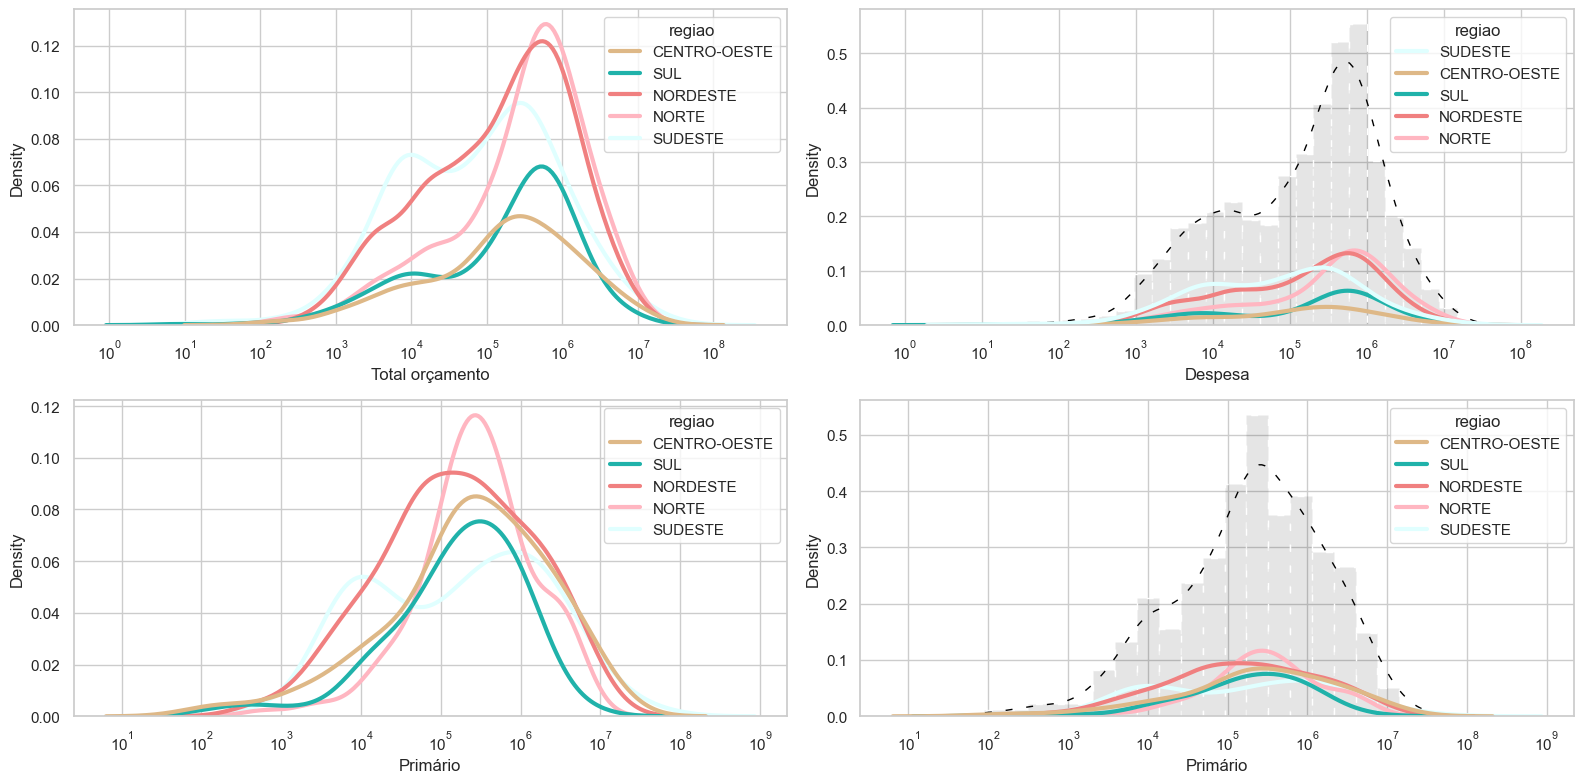

In [12]:
# Análise da distribuição do orçamento, visualizando os dados de acordo com a região do país

## Observa-se que as dsitribuições de Total e Despesa guardam semelhança relevante nas distribuições.
### Nesses casos existe a aparência de bimodalidade, o que pode ser explorado;
### Também é possível observar que as regiões Norte e Nordeste tem comportamento próximo (Total/despesas)

## No caso dos resultados primários, somente Sudeste aparente ter comportamento diferente
## As distribuições das demais regiões aparentam relativa normalidade

plot_kde(df_investimento)

In [13]:
# Análise da dimensão temporal e sua relação com o volume de recursos

## Pico em agosto, outubro e dezembro, para todas as regiões
## Após recesso parlamentar de julho?
## Datas festivas (padroeira e fim de ano)?

### Qual impacto de eleições (anos pares)?

plot_time_serie(df_investimento, df)

In [14]:
# Análise da relação entre Despesa/primário com a destinação dos recursos, agrupado regionalmente

## Centro-Oeste é o único caso com maior primário do que receita - Efeito DF?

## Encargos especiais (MF) tem maior alocação de recursos consistentemente
## Principal alocação de primário é em Transporte/Urbanismo (MT)

plot_sun(df_investimento)

## Visualização exploratória dos dados - Dados Maturidade

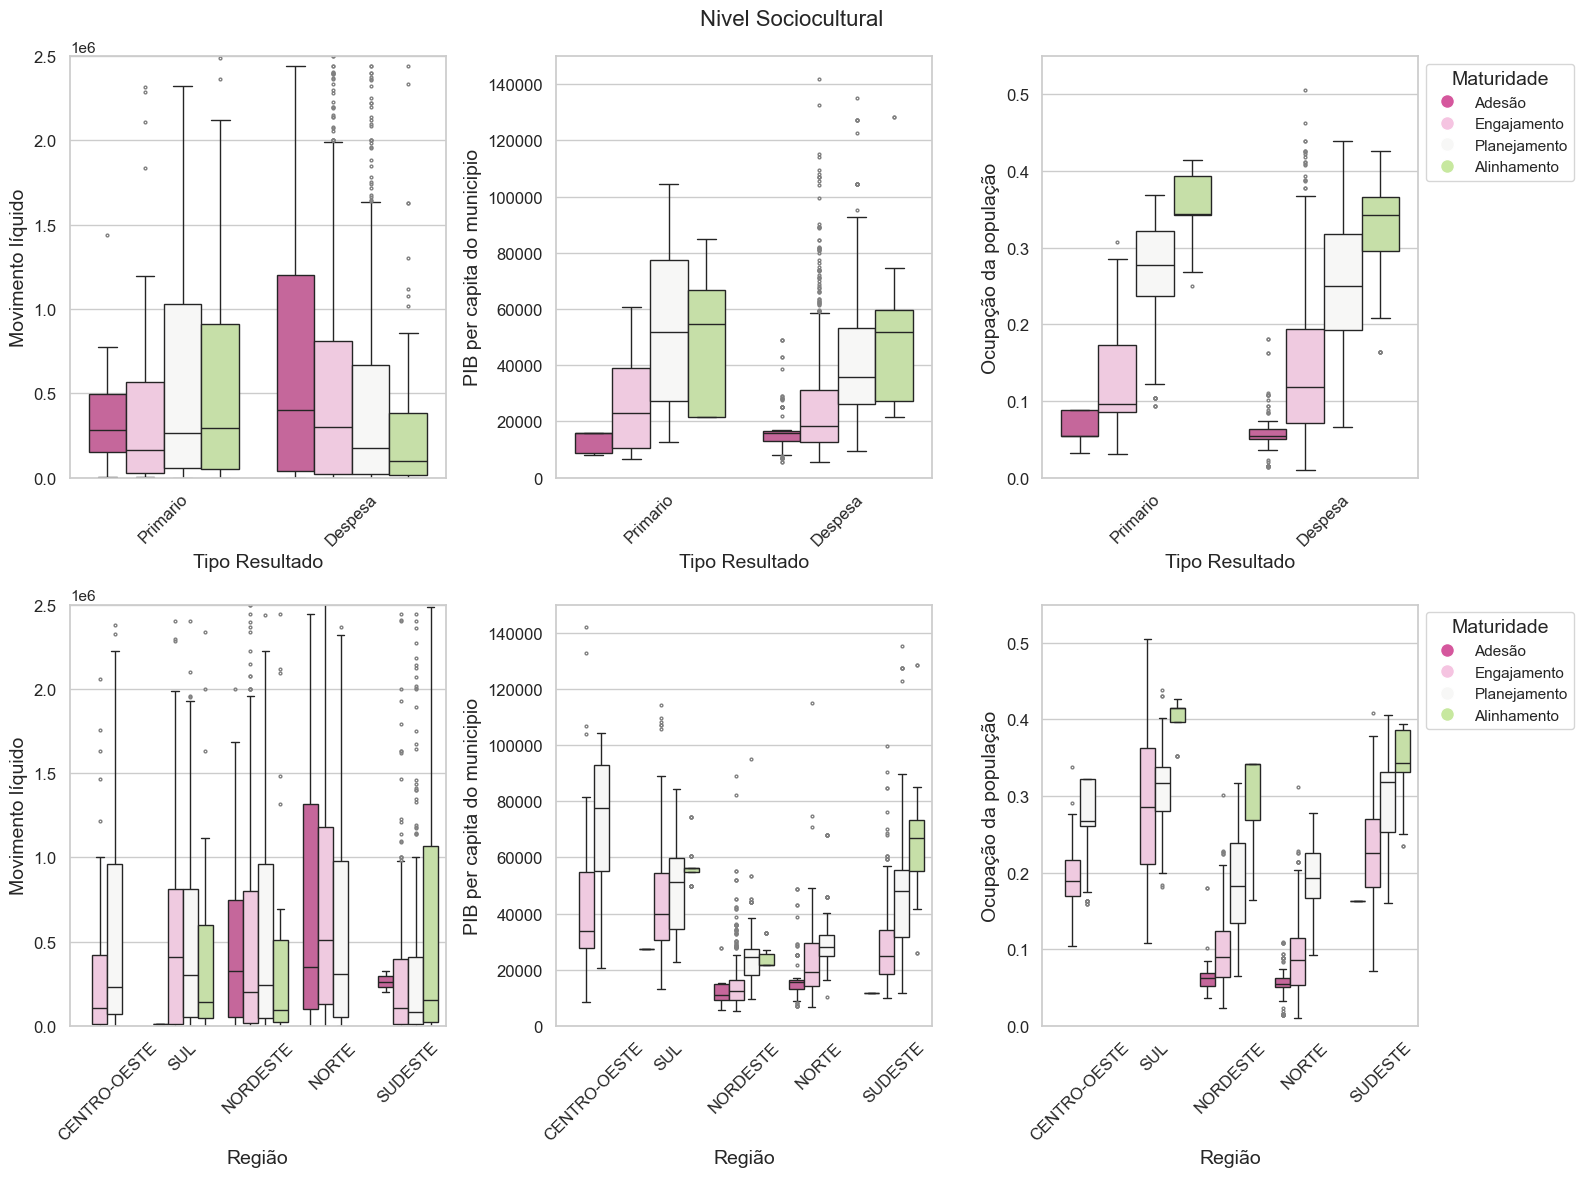

In [15]:
df_sns = pd.merge(df_investimento, df_maturidade, how = 'left', on = ['codigo'])
df_sns = df_sns[df_sns['movimento_liquido_reais'] > 0]

dimensoes = [idx for idx in df_sns.columns if 'Nivel' in idx]
plot_box(df_sns, dimensoes[0])

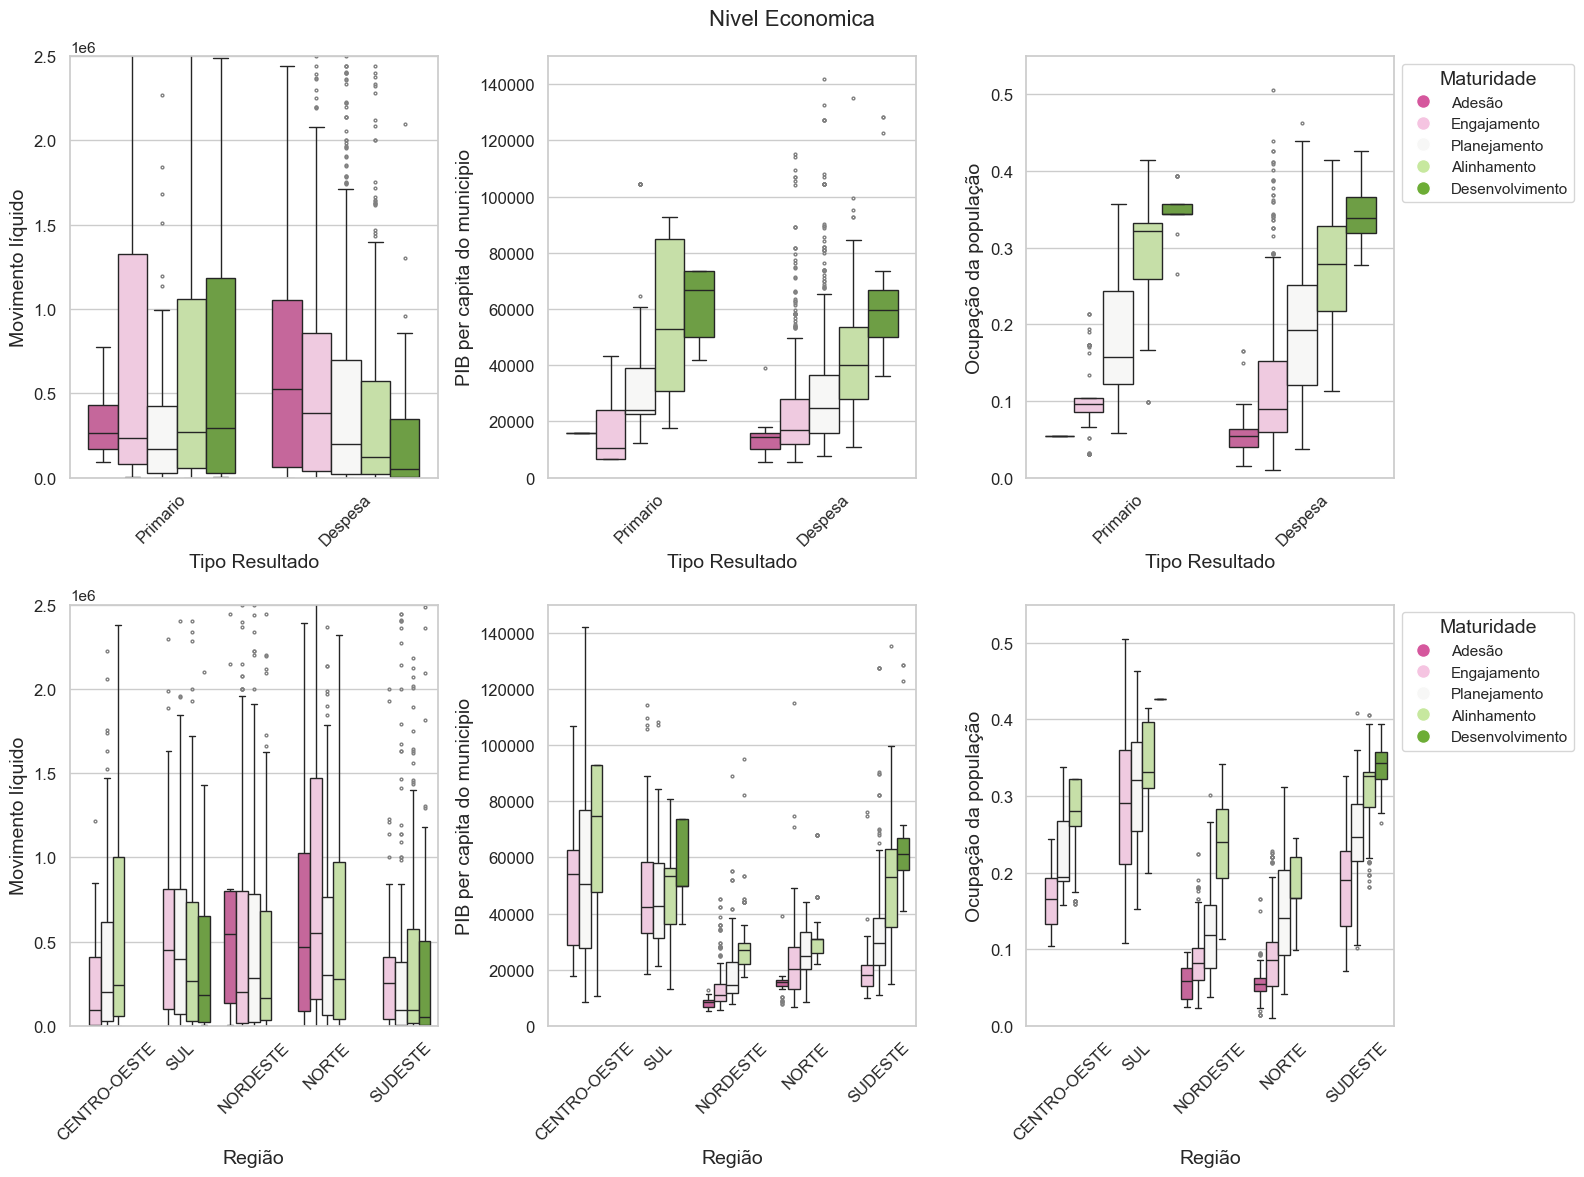

In [16]:
dimensoes = [idx for idx in df_sns.columns if 'Nivel' in idx]
plot_box(df_sns, dimensoes[1])

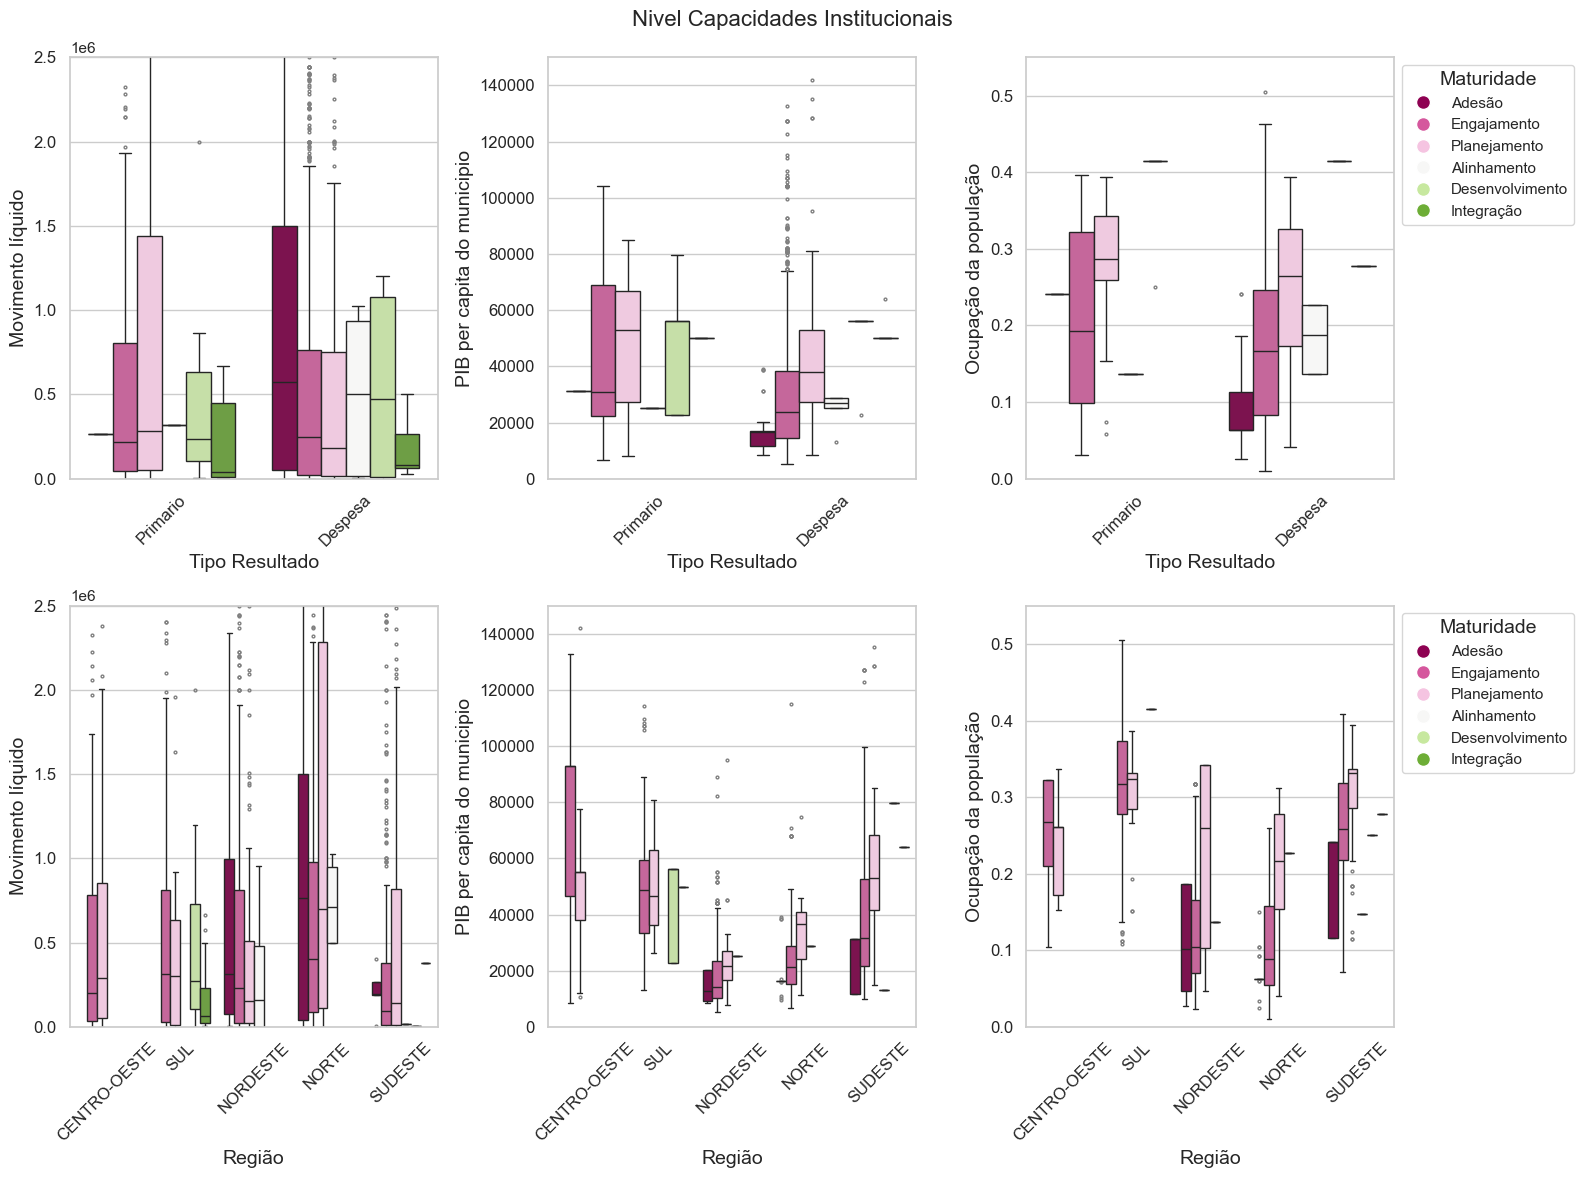

In [17]:
dimensoes = [idx for idx in df_sns.columns if 'Nivel' in idx]
plot_box(df_sns, dimensoes[2])

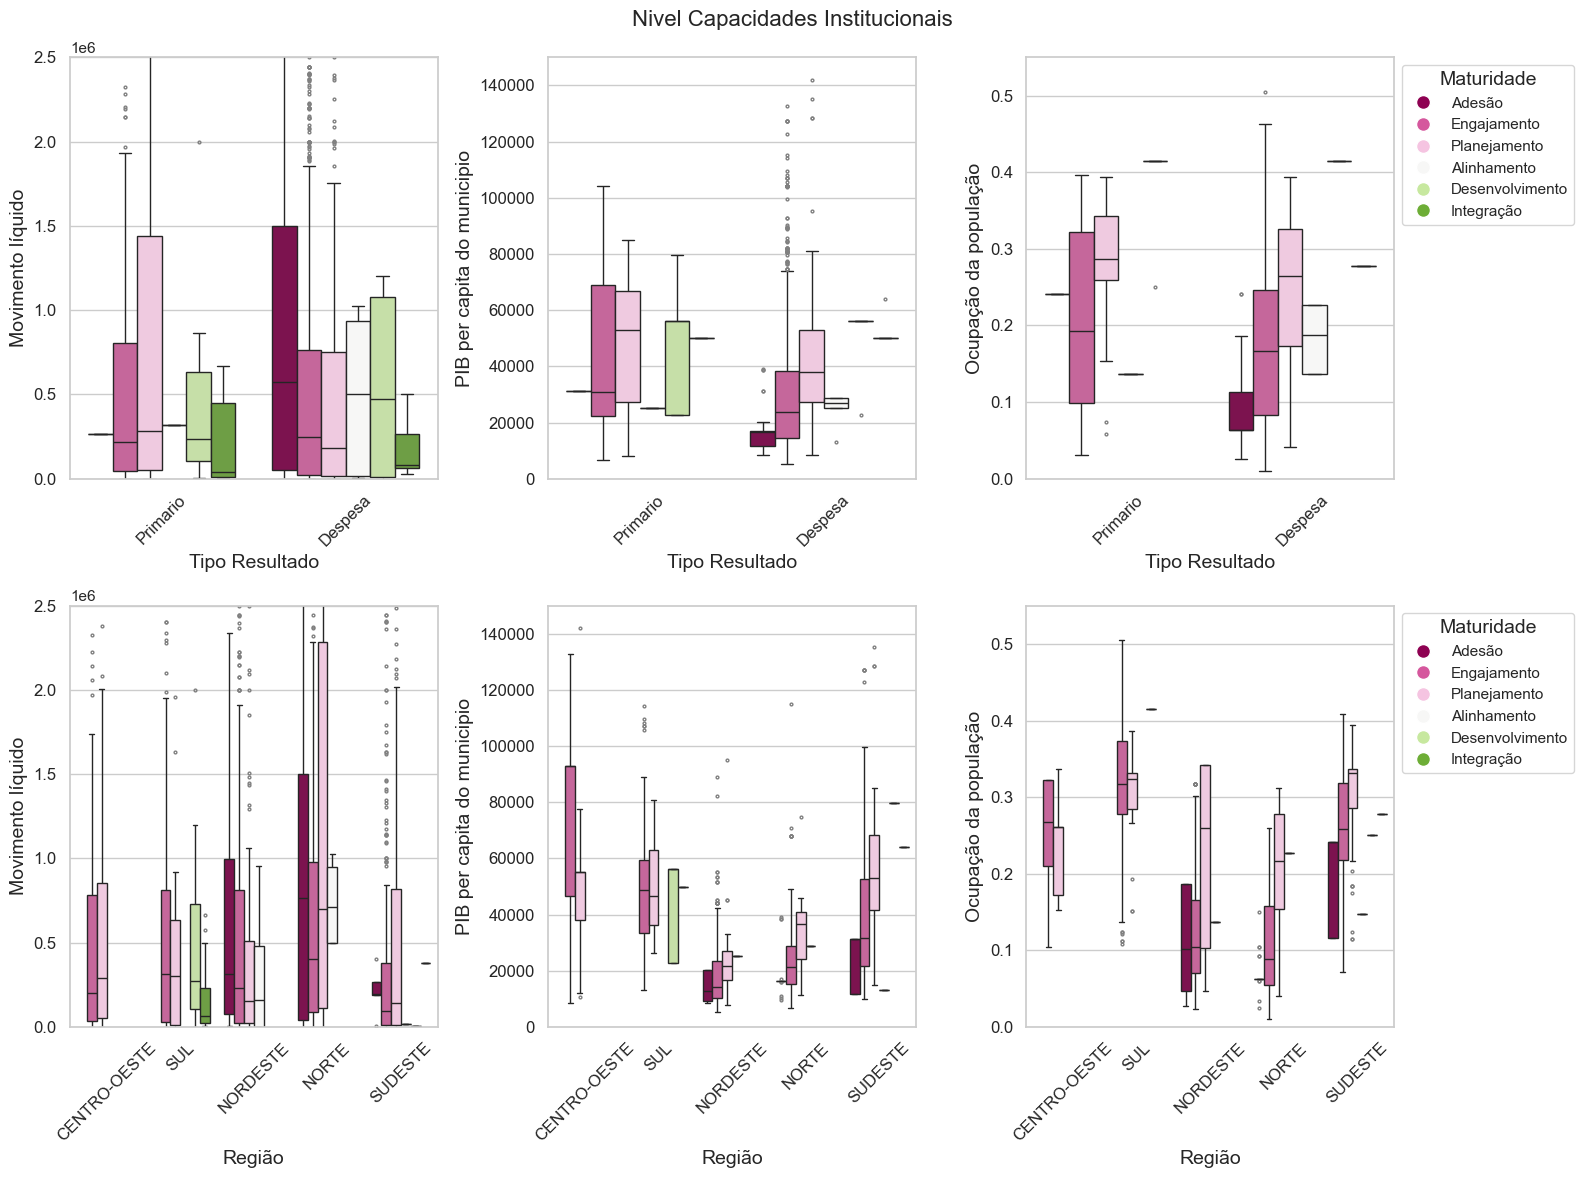

In [18]:
dimensoes = [idx for idx in df_sns.columns if 'Nivel' in idx]
plot_box(df_sns, dimensoes[2])

In [31]:
df_pair = df_sns[[
    'codigo', 'PIB per capita do municipio',
    'Ocupacao_populacao',
    'movimento_liquido_reais',
    'Nivel Sociocultural', 'Nivel Economica',
    'Nivel Capacidades Institucionais', 'Nivel Meio Ambiente']].drop_duplicates()

df_pair = df_pair.groupby('codigo').agg({
    'movimento_liquido_reais': 'sum',   # Sum 'movimento_liquido_reais'
    'PIB per capita do municipio': 'mean',
    'Ocupacao_populacao': 'mean',
    'Nivel Sociocultural': 'mean',
    'Nivel Economica': 'mean',
    'Nivel Capacidades Institucionais': 'mean',
    'Nivel Meio Ambiente': 'mean'
}).reset_index().drop(columns = ['codigo'])

df_pair

movimento_liquido_reais  PIB per capita do municipio  \
0                2.451507e+06                     28878.27   
1                3.500000e+05                     47051.83   
2                3.839207e+06                     32313.26   
3                1.235079e+06                     22462.79   
4                2.086387e+06                     32292.16   
...                       ...                          ...   
1050             6.100000e+03                     10740.31   
1051             4.373592e+06                     39235.95   
1052             6.900000e+04                    103995.03   
1053             3.998100e+04                     31588.72   
1054             1.252486e+08                     92732.27   

      Ocupacao_populacao  Nivel Sociocultural  Nivel Economica  \
0               0.226627                  4.0              4.0   
1               0.191179                  3.0              3.0   
2               0.225718                  4.0              4.0   
3               0.188641                  3.0              4.0   
4               0.259658                  4.0              4.0   
...                  ...                  ...              ...   
1050            0.206580                  3.0              5.0   
1051            0.163074                  4.0              5.0   
1052            0.241725                  3.0              3.0   
1053            0.209303                  4.0              5.0   
1054            0.322225                  4.0              5.0   

      Nivel Capacidades Institucionais  Nivel Meio Ambiente  
0                                  4.0                  4.0  
1                                  2.0                  2.0  
2                                  2.0                  3.0  
3                                  2.0                  3.0  
4                                  2.0                  3.0  
...                                ...                  ...  
1050                               3.0                  4.0  
1051                               3.0                  3.0  
1052                               2.0                  2.0  
1053                               2.0                  4.0  
1054                               2.0                  4.0  

[1055 rows x 7 columns]

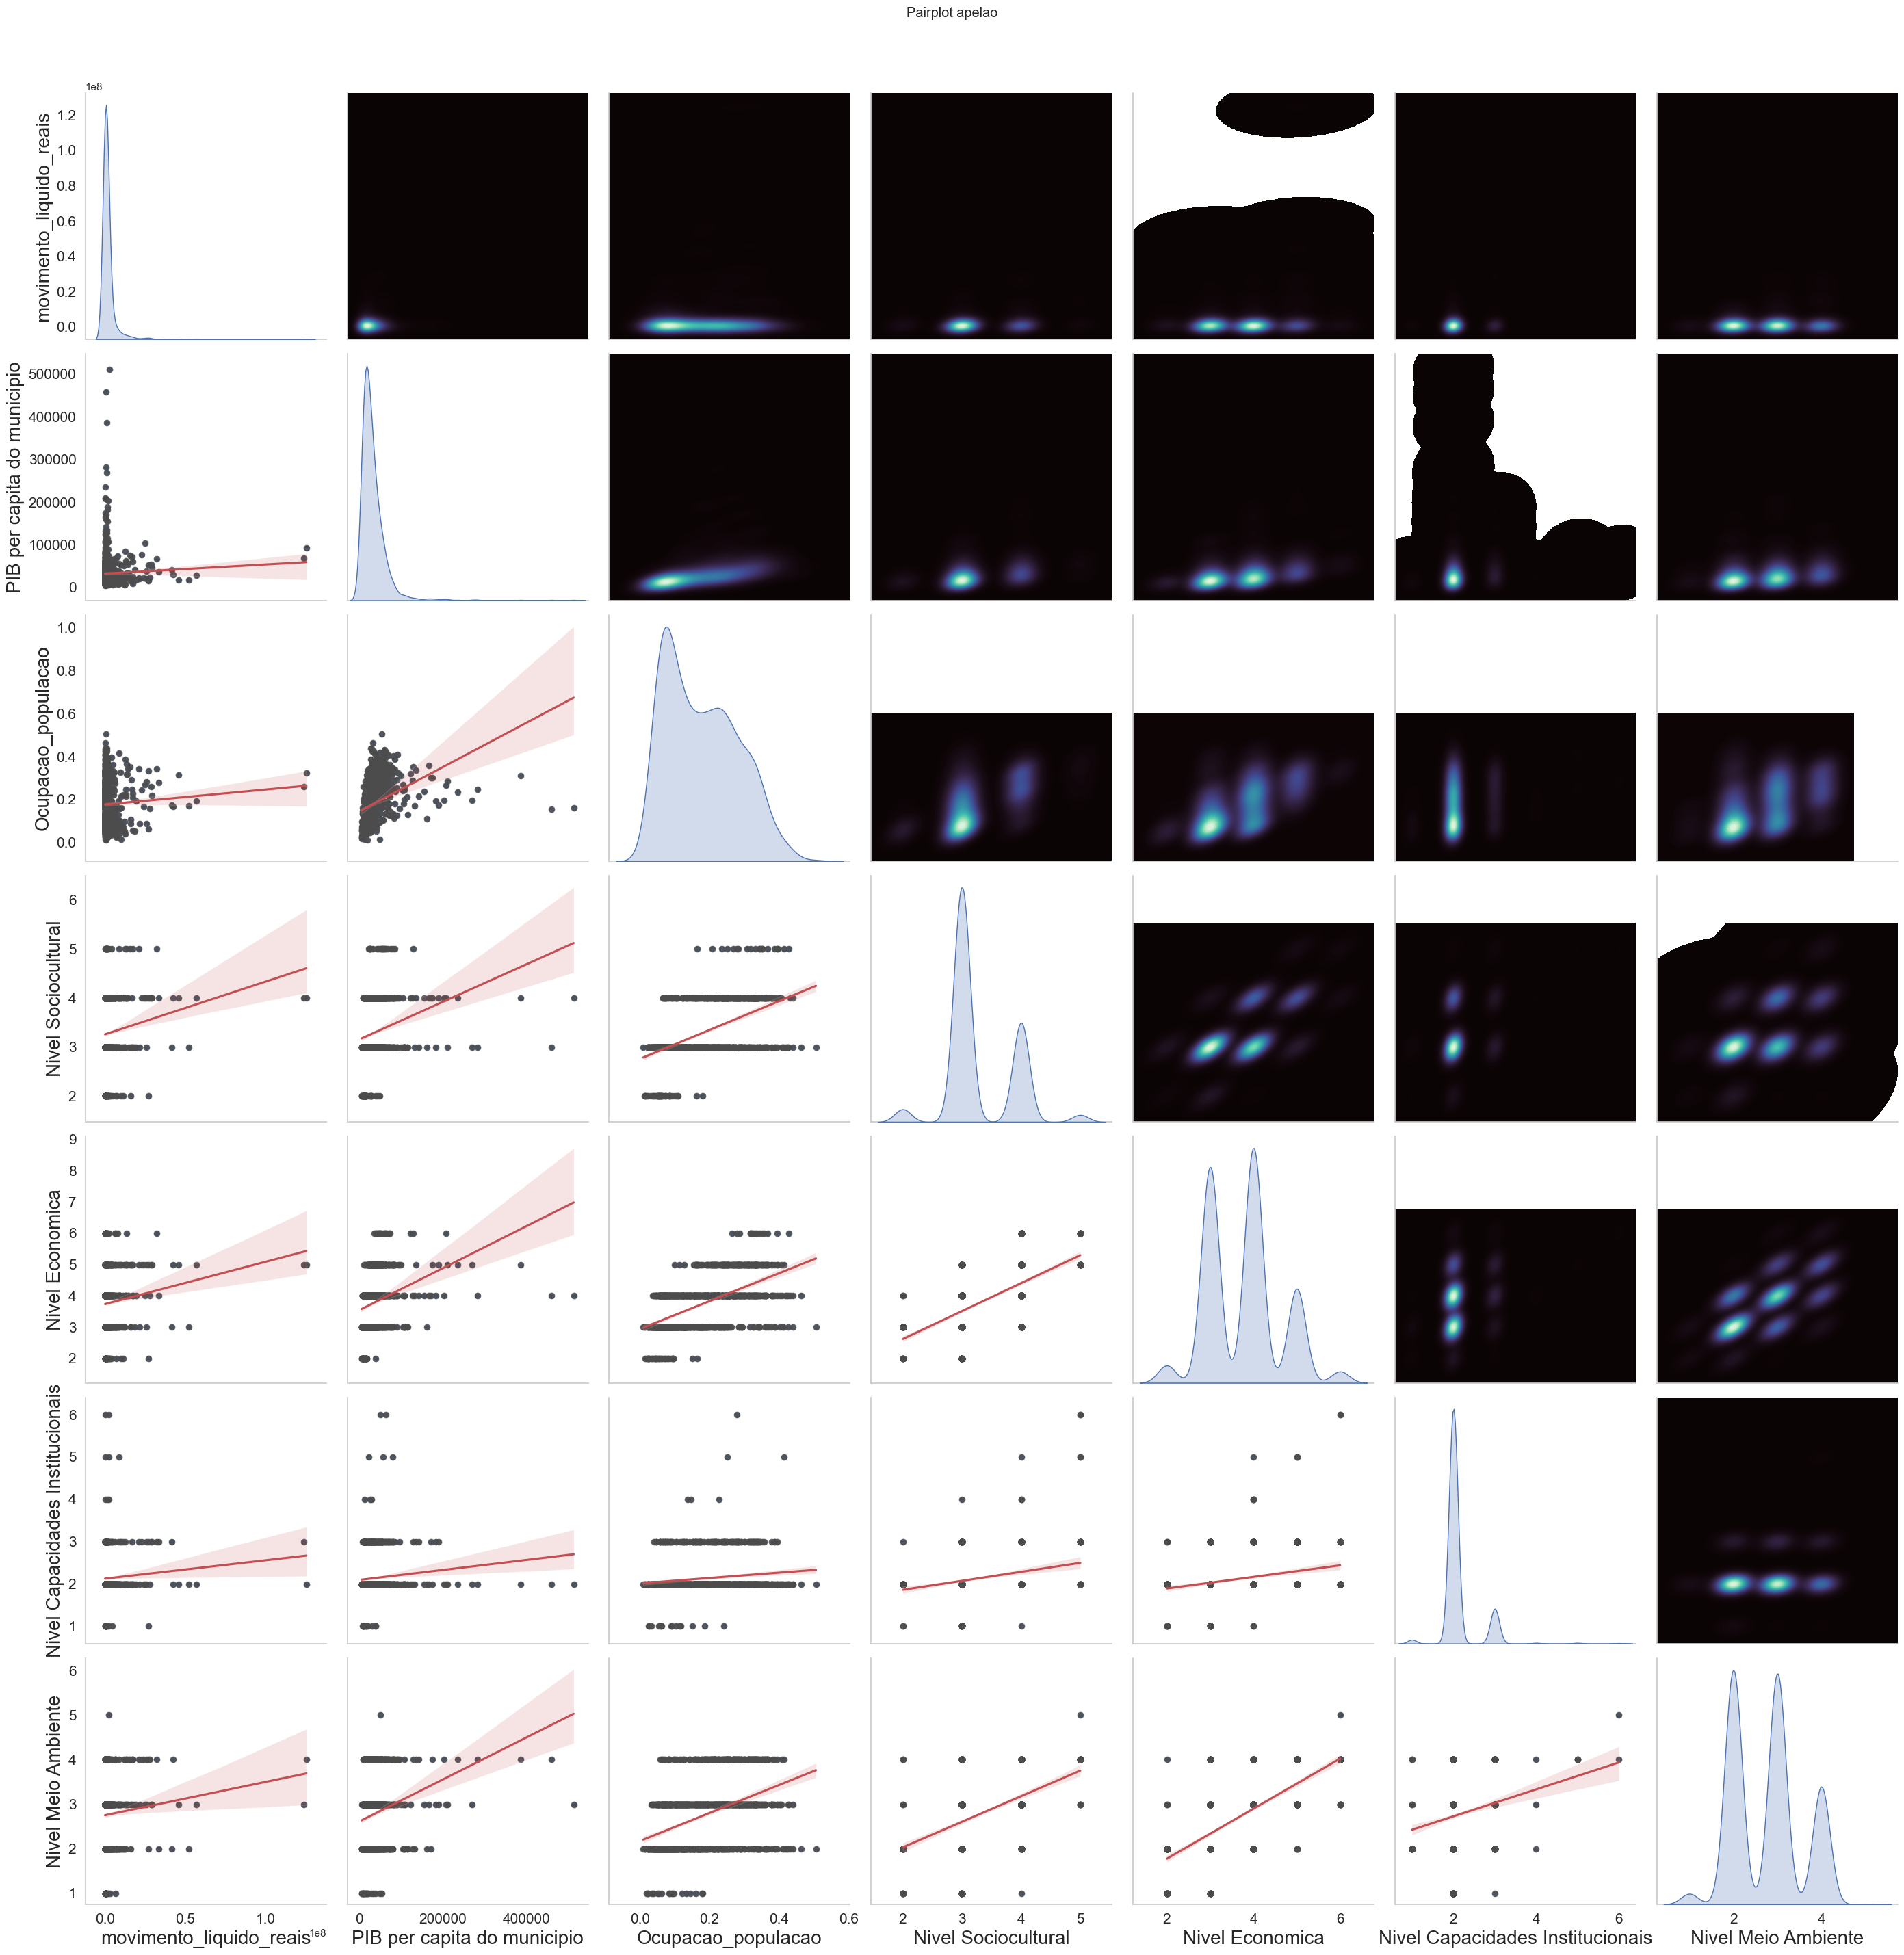

In [32]:
plot_size = (4, 4)

g = sns.pairplot(df_pair, diag_kind='kde', height=plot_size[1], aspect=plot_size[0]/plot_size[1])
g.map_upper(sns.kdeplot, fill=True, thresh=0, levels=125, cmap="mako")
g.map_lower(sns.regplot, color=".3", line_kws=dict(color="r"))
g.fig.suptitle("Pairplot apelao", y=1.02)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)  # Change label size as desired
    ax.grid(True, color='white')
    
plt.tight_layout()
plt.show()